# <font color='Orange'>Rule-Based Classification on Personas</font> 

### <font color='Orange'>Business Problem</font> 

A game company wants to create level-based new customer definitions (personas) by using some features of its customers, and to create segments according to these new customer definitions and to estimate how much the new customers can earn on average according to these segments.

For example: It is desired to determine how much a 25-year-old male user from Turkey, who is an IOS user, can earn on average.

### <font color='Orange'>Dataset Definition</font> 
The "persona.csv" dataset contains the prices of the products sold by an international game company and some demographic information of the users who buy these products.

<div class="alert alert-block alert-warning">
<b>Warning:</b> The data set consists of records created in each sales transaction. This means that the table is not deduplicated. In other words, a user with certain demographic characteristics may have made more than one purchase.
</div> <br>


* Price: Customer's spending amount <br><br>
* Source: The type of device the customer is connecting to <br><br>
* Sex: Gender of the client <br><br>
* Country: Country of the customer <br><br>
* Age: Customer's age

### <font color='Orange'>Before Classification</font> 

<img src="images/before_classification.png" width=640 height=195 />

### <font color='Orange'>After Classification</font> 

<img src="images/after_classification.png" width=640 height=195 />

In [31]:
# import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# reading data

df = pd.read_csv("persona.csv")
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [33]:
# descriptive statistics information

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,5000.0,34.1320,12.464897,9.0,29.0,39.0,39.0,59.0
AGE,5000.0,23.5814,8.995908,15.0,17.0,21.0,27.0,66.0


In [34]:
# information about entries

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


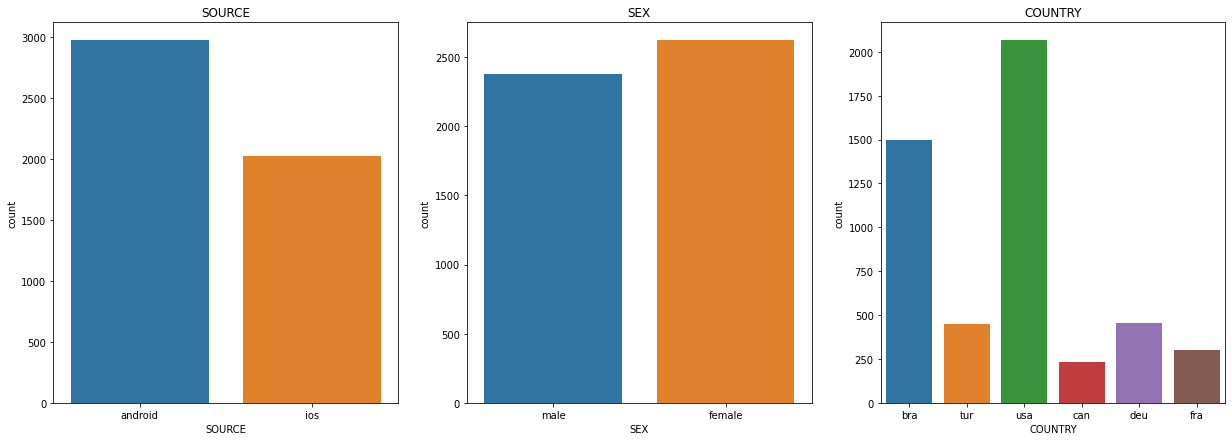

In [35]:
plt.figure(figsize=(21, 7))

plt.subplot(1, 3, 1)
sns.countplot(x = df["SOURCE"], data=df)
plt.title("SOURCE")

plt.subplot(1, 3, 2)
sns.countplot(x = df["SEX"], data=df)
plt.title("SEX")

plt.subplot(1, 3, 3)
sns.countplot(x = df["COUNTRY"], data=df)
plt.title("COUNTRY")

plt.show()

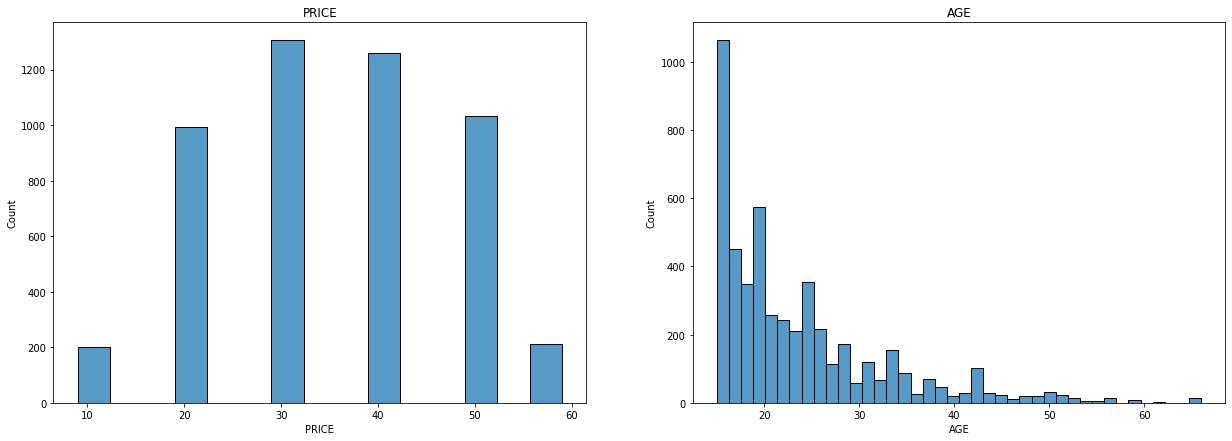

In [36]:
plt.figure(figsize=(21, 7))

plt.subplot(1, 2, 1)
sns.histplot(df["PRICE"], bins=15)
plt.title("PRICE")

plt.subplot(1, 2, 2)
sns.histplot(df["AGE"], bins=40)
plt.title("AGE")

plt.show()

In [37]:
# when I look at the targeted dataframe, the groupby operation based on price

new_df = df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"]).agg({"PRICE" : np.mean}).sort_values(by="PRICE", ascending=False)

new_df.reset_index(inplace=True)

new_df

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0
...,...,...,...,...,...
343,usa,ios,female,38,19.0
344,usa,ios,female,30,19.0
345,can,android,female,27,19.0
346,fra,android,male,18,19.0


In [38]:
# age range included in the targeted "customers_level_based" feature

bins = [0, 18, 23, 30, 40, new_df["AGE"].max()] 

labels = ["0_18", "19_23", "24_30", "31_40", "41_{}".format(new_df["AGE"].max())]

new_df["CATEGORIC_AGE"] = pd.cut(new_df["AGE"], bins=bins, labels=labels)

new_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,CATEGORIC_AGE
0,bra,android,male,46,59.0,41_66
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40
...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,31_40
344,usa,ios,female,30,19.0,24_30
345,can,android,female,27,19.0,24_30
346,fra,android,male,18,19.0,0_18


In [39]:
# I create targeted feature with "COUNTRY", "SOURCE", "SEX", "AGE"

new_df["customers_level_based"] = [col[0].upper() + "_" + col[1].upper() + "_" + col[2].upper() + "_" + col[5] for col in new_df.values]

new_df

,COUNTRY,SOURCE,SEX,AGE,PRICE,CATEGORIC_AGE,customers_level_based
0,bra,android,male,46,59.0,41_66,BRA_ANDROID_MALE_41_66
1,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40
...,...,...,...,...,...,...,...
343,usa,ios,female,38,19.0,31_40,USA_IOS_FEMALE_31_40
344,usa,ios,female,30,19.0,24_30,USA_IOS_FEMALE_24_30
345,can,android,female,27,19.0,24_30,CAN_ANDROID_FEMALE_24_30
346,fra,android,male,18,19.0,0_18,FRA_ANDROID_MALE_0_18


In [40]:
# I remember the warning in the notebook entry

new_df["customers_level_based"].value_counts()

BRA_ANDROID_MALE_24_30      7
USA_ANDROID_MALE_41_66      7
USA_IOS_FEMALE_24_30        7
BRA_ANDROID_FEMALE_24_30    7
USA_ANDROID_MALE_24_30      7
                           ..
TUR_ANDROID_MALE_41_66      1
CAN_ANDROID_MALE_19_23      1
TUR_IOS_MALE_31_40          1
TUR_IOS_MALE_24_30          1
CAN_ANDROID_FEMALE_24_30    1
Name: customers_level_based, Length: 109, dtype: int64

In [41]:
# Since there are more than one observation, I deduplicate according to price.

new_df = new_df.groupby("customers_level_based").agg({"PRICE" : "mean"})

new_df.reset_index(inplace=True)

new_df

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_66,36.737179
...,...,...
104,USA_IOS_MALE_0_18,33.983495
105,USA_IOS_MALE_19_23,34.901872
106,USA_IOS_MALE_24_30,34.838143
107,USA_IOS_MALE_31_40,36.206324


In [42]:
new_df["SEGMENT"] = pd.qcut(new_df["PRICE"], 5, labels=["very_low_income", "low_income", "middle_income", "high_income", "very_high_income"])

new_df

,customers_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,high_income
1,BRA_ANDROID_FEMALE_19_23,34.077340,middle_income
2,BRA_ANDROID_FEMALE_24_30,33.863946,middle_income
3,BRA_ANDROID_FEMALE_31_40,34.898326,high_income
4,BRA_ANDROID_FEMALE_41_66,36.737179,very_high_income
...,...,...,...
104,USA_IOS_MALE_0_18,33.983495,middle_income
105,USA_IOS_MALE_19_23,34.901872,high_income
106,USA_IOS_MALE_24_30,34.838143,high_income
107,USA_IOS_MALE_31_40,36.206324,high_income


In [43]:
# some functions for query format

def create_age_interval(age):
    if age>0 and age<=18:
        age_interval = "0_18"
    elif age>18 and age<=23:
        age_interval = "19_23"
    elif age>23 and age<=30:
        age_interval = "24_30"
    elif age>30 and age<=40:
        age_interval = "31_40"
    else:
        age_interval = "41_{}".format(new_df["AGE"].max())
    
    return age_interval

def create_customer(country, source, sex, age_interval):
    customer = country + "_" + source + "_" + sex + "_" + age_interval

    return customer

In [44]:
# QUERY & CLASSIFY

# In which segment and on average how much income would a 35-year-old French woman using iOS expect to earn?

### changeable ###
country = "FRA"
source = "IOS"
sex = "FEMALE"
age = 35
##################

age_interval = create_age_interval(age)
customer = create_customer(country, source, sex, age_interval)

new_df[new_df["customers_level_based"] == customer]

,customers_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.818182,low_income
